In [1]:
import pandas as pd

In [14]:
import glob

## Data 명세

### Song 정보

1. 가수
2. 제목
3. 앨범
4. 장르

### Input

1. 태그명 하나
2. 가수 ID
3. 곡 ID
4. 앨범 ID
5. 장르 ID
6. Target  -> 1/0

In [15]:
df_meta = pd.read_json('../data/song_meta.json')

In [2]:
df = pd.read_json('data_15_30.json')

In [16]:
df_meta

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4
...,...,...,...,...,...,...,...,...,...
707984,[GN2001],19991219,The Best Best Of The Black President,65254,[166499],Coffin For Head Of State,[GN2000],[Fela Kuti],707984
707985,[GN0901],19860000,True Colors,44141,[11837],Change Of Heart,[GN0900],[Cyndi Lauper],707985
707986,"[GN0105, GN0101]",20160120,행보 2015 윤종신 / 작사가 윤종신 Live Part.1,2662866,[437],스치듯 안녕,[GN0100],[윤종신],707986
707987,"[GN1807, GN1801]",20131217,명상의 시간을 위한 뉴에이지 음악,2221722,[729868],숲의 빛,[GN1800],[Nature Piano],707987


In [4]:
from sklearn.model_selection import train_test_split

In [19]:
?train_test_split

In [21]:
df['tag_len'] = df.tags.map(lambda x: len(x))

In [42]:
a = list(set([song for songs in df.songs
 for song in songs]))

In [44]:
len(a) # 전체 unique songs

285613

In [45]:
all_songs = [song for songs in df.songs
 for song in songs]

In [46]:
len(all_songs)

995783

In [70]:
df_songs = pd.Series(all_songs).reset_index()

In [75]:
df_songs.shape

(995783, 2)

In [82]:
songs3 = df_songs.set_index(0)[songs_more_3].index.tolist()

/Users/josang-yeon/tobigs/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [83]:
songs3 = list(set(songs3))

In [84]:
len(songs3)

74472

In [64]:
songs_more_3 = pd.Series(all_songs).value_counts() >= 3

In [86]:
songs3_dict = {
    song_id: True
   for song_id in songs3
}

In [88]:
# songs3_dict.keys()

In [89]:
df['songs2'] = df.songs.map(lambda x: [song for song in x if songs3_dict.get(song)])

In [90]:
df['songs2']

0        [525514, 562083, 297861, 139541, 650298, 53105...
1        [83116, 276692, 166267, 354465, 256598, 666852...
2        [418694, 222305, 96545, 135950, 304687, 457451...
3        [632529, 501426, 515574, 411161, 103411, 17813...
4                 [439294, 113479, 146292, 497811, 337875]
                               ...                        
45433                                     [349756, 608546]
45434    [619719, 374517, 323561, 79157, 241952, 587512...
45435    [627005, 253230, 643932, 22659, 316149, 247137...
45436    [65053, 389127, 443914, 498028, 375431, 312296...
45437    [287003, 408232, 625933, 543298, 222713, 10445...
Name: songs2, Length: 45438, dtype: object

In [91]:
a2 = list(set([song for songs in df.songs2
 for song in songs]))

In [92]:
len(a2) # 전체 unique songs

74472

In [94]:
df['song2_len'] = df['songs2'].map(lambda x: len(x))

In [98]:
df2 = df[df.song2_len >= 15]

In [101]:
df.to_json('data_version_1_5.json')

In [99]:
df2.to_json('data_version_2.json')

In [100]:
df2.shape

(29354, 10)

In [25]:
X = df
y = df['id']

In [36]:
?train_test_split

In [33]:
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.3)

In [34]:
X_train.shape

(31806, 8)

In [35]:
x_test.shape

(13632, 8)

In [39]:
X_train

,tags,id,plylst_title,songs,like_cnt,updt_date,len,tag_len
15035,[인디],36619,봄을 맞이하는 마음의 자세,"[193320, 594824, 259920, 117084, 302646, 65049...",21,2016-06-24 09:19:48.000,20,1
20294,[쇼미더머니],15125,나힙소! 나만 알고 싶은 힙합왕을 소개합니다,"[186812, 556016, 13197, 609067, 625598, 344180...",6,2019-08-26 14:26:59.000,20,1
31791,[가요],143542,오디션. 어머! 이건 들어야해 23,"[659818, 503908, 39083, 86824, 514368, 300676,...",0,2019-03-27 15:27:08.000,30,1
13957,[발라드],57337,♥남자들의사랑이야기♥,"[325047, 598836, 418372, 617485, 196161, 22630...",0,2008-08-15 02:49:24.000,20,1
31334,[Coldplay],68896,겨울 밤 위로가 되는 노래,"[6237, 331055, 17907, 229578, 433997, 76453, 5...",8,2018-12-28 21:13:48.000,19,1
...,...,...,...,...,...,...,...,...
20583,"[힐링, 휴식, 잔잔한]",13391,감성pop/아이 원트 휴식,"[2194, 205910, 261456, 208867, 486784, 618132,...",3,2016-09-26 10:16:48.000,22,3
25960,"[퇴근, 한강, 발라드, 버스, 지하철, 생각, 아픔, 월요일]",26658,"버스,지하철에서 넋놓고 틀어놓는 곡들","[543820, 374156, 8719, 357367, 415017, 516653,...",124,2017-09-28 18:10:35.000,30,8
15058,"[커피, 오후, 인디]",138868,따사로운 오후 커피 한 잔과 어울리는 노래,"[253167, 600535, 597949, 102349, 382728, 62671...",1,2020-03-28 23:10:38.000,20,3
27547,[발라드],110503,두근두근 크리스마스?,"[141331, 112399, 133309, 438403, 651749, 32620...",10,2013-12-13 18:00:28.000,26,1


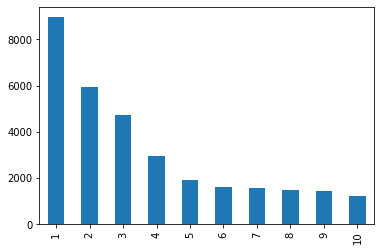

In [37]:
X_train.tags.map(lambda x: len(x)).value_counts().plot.bar()

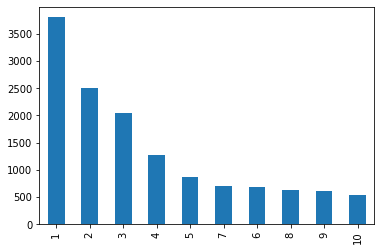

In [38]:
x_test.tags.map(lambda x: len(x)).value_counts().plot.bar()

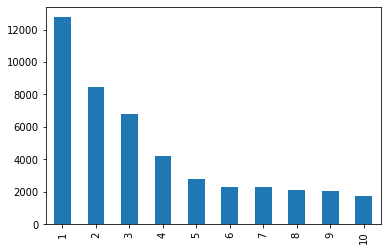

In [8]:
df.tags.map(lambda x: len(x)).value_counts().plot.bar()

In [9]:
df

,tags,id,plylst_title,songs,like_cnt,updt_date,len
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000,19
1,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000,28
2,"[운동, 드라이브, Pop, 트로피컬하우스, 힐링, 기분전환, 2017, 팝, 트렌...",69252,2017 Pop Trend,"[418694, 222305, 96545, 135950, 304687, 457451...",435,2017-09-15 15:59:26.000,30
3,"[잔잔한, 추억, 회상]",36557,멍청이.. 내맘도 몰라.,"[496913, 632529, 501426, 515574, 411161, 10341...",5,2008-09-23 22:32:02.000,20
4,"[록, Metal, M에센셜, 메탈, Rock, 락]",10288,[록/메탈] Written by 이일우,"[613315, 439294, 230806, 497932, 113479, 93506...",7,2016-06-17 18:23:54.000,15
...,...,...,...,...,...,...,...
45433,"[클럽, 홍대, 운동, 열정, EDM, 20대, 라운지, 느낌, 일렉]",152310,4.일렉_ComeTogether!!!_custom.GOGR,"[91526, 297952, 242297, 583808, 280489, 524940...",18,2017-08-24 00:55:43.000,17
45434,[팝],33486,들을수록 걸크러쉬 물씬 느껴지는 음악리스트,"[619719, 374517, 323561, 79157, 170970, 241952...",4,2017-03-18 00:07:08.000,29
45435,[인디],153220,오후의 어쿠스틱 vol.2,"[627005, 253230, 643932, 22659, 316149, 247137...",39,2013-04-19 01:36:45.000,21
45436,[여친],79538,여자친구 명곡,"[65053, 389127, 443914, 498028, 375431, 312296...",6,2018-03-09 14:24:37.000,23


In [ ]:
train_test_split()